# Overfitting 문제 해결을 위한 일반적인 방법 : 정규화

- L1 정규화 : 모든 절대 가중치의 합에 비례하는 점수화 함수에 적용.가중치 벡터의 L1 norm(직선 거리, 맨허튼 거리...), Lasso regression
- L2 정규화 : 모든 제곱된 가중치의 합에 비례하는 점수화 함수에 적용. 가중치 벡터의 L2 norm(유클리드 거리) 기반. ridge regression

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn import model_selection as model
from sklearn import linear_model

from sklearn import datasets
from sklearn import metrics

In [4]:
# 일반 선형 회귀
linreg = linear_model.LinearRegression()
# 라소 회귀
lassoreg = linear_model.Lasso()
# 리지 회귀
ridgereg = linear_model.Ridge()

### boston 문제에 각 회귀 방법 비교해보기

In [8]:
boston = datasets.load_boston()

In [10]:
X_train, X_test, y_train, y_test = model.train_test_split(boston.data, boston.target, test_size=0.1, random_state=42)

In [12]:
# 선형 회귀
linreg.fit(X_train, y_train)

0.7595709869268945

In [14]:
# 라소 회귀
lassoreg.fit(X_train, y_train)

0.7011167423790391

In [17]:
# 리지 회귀
ridgereg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
regressions = [linreg, lassoreg, ridgereg]

In [42]:
def test_models():
    y_preds = []
    for reg in regressions:
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        metrics.mean_squared_error(y_test, y_pred)
        y_preds.append(y_pred)
        
    return y_preds

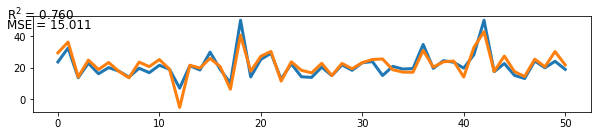

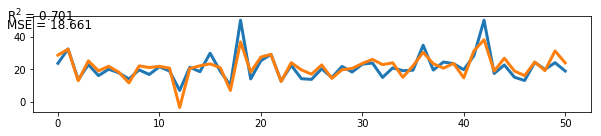

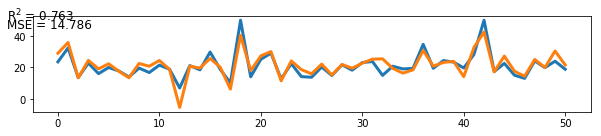

In [46]:
y_preds = test_models()
for i, y_pred in enumerate(y_preds):
    plt.figure(figsize=(10,6))
    plt.subplot(3,1,i+1)
    plt.plot(y_test, linewidth=3, label='ground truth')
    plt.plot(y_pred, linewidth=3, label='predicted')
    
    scorestr = r'R$^2$ = %.3f' % regressions[i].score(X_test, y_test)
    errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
    plt.text(-5, 50, scorestr, fontsize=12)
    plt.text(-5, 45, errstr, fontsize=12)